<a href="https://colab.research.google.com/github/Vinodhini96/LetsGrowMore_Internship_task/blob/main/LetsGrowMore_task_5_HandwritingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Develop a Neural Network that can read Handwriting

Data Science Project

By

Vinodhini Rajamanickam

## import necessary ibraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt


## Load and Preprocess the Data

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension (needed for CNN)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


11490434/11490434 [==============================] - 1s 0us/step


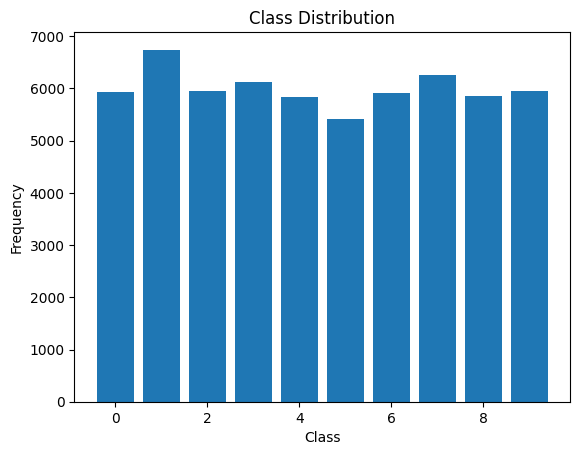

Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28, 1)
Number of classes: 10


In [14]:
# Analyze class distribution
plt.hist(train_labels, bins=range(11), rwidth=0.8, align='left')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

# Visualize some statistics about the dataset
print(f"Number of training samples: {len(train_images)}")
print(f"Number of testing samples: {len(test_images)}")
print(f"Image shape: {train_images[0].shape}")
print(f"Number of classes: {len(set(train_labels))}")



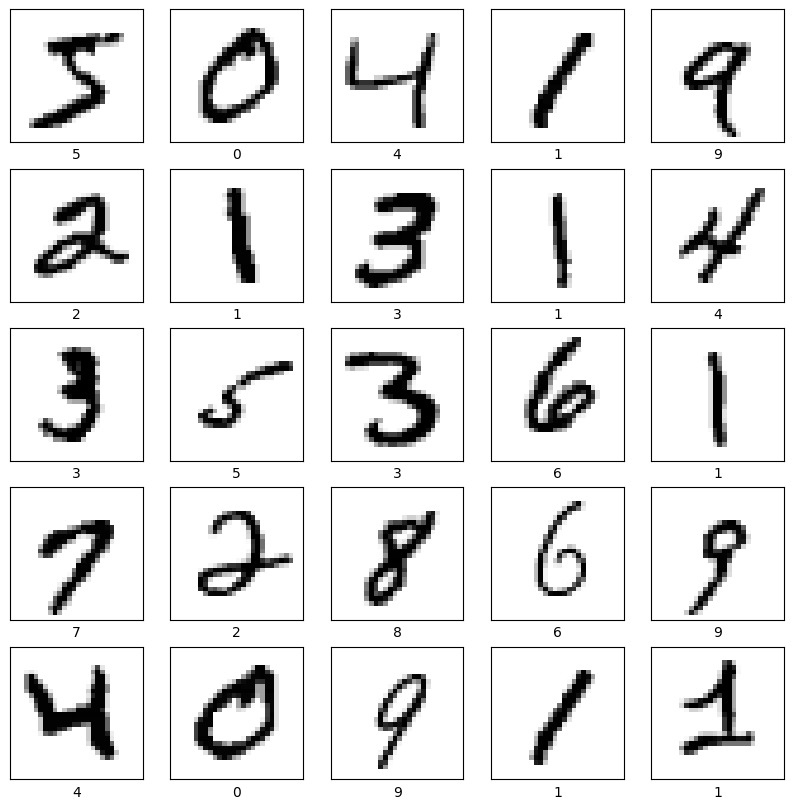

In [15]:
# Display a few sample images

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


## Build the CNN Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

# Add a dense layer on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


## Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train the Model

In [5]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1504 - accuracy: 0.9535 - val_loss: 0.0519 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0382 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0267 - val_accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0249 - val_accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0268 - val_accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0341 -

##  Evaluate the Model

In [6]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")


313/313 [==============================] - 3s 10ms/step - loss: 0.0428 - accuracy: 0.9893
Test accuracy: 0.989300012588501


## Make Predictions

In [7]:
predictions = model.predict(test_images)


313/313 [==============================] - 3s 10ms/step


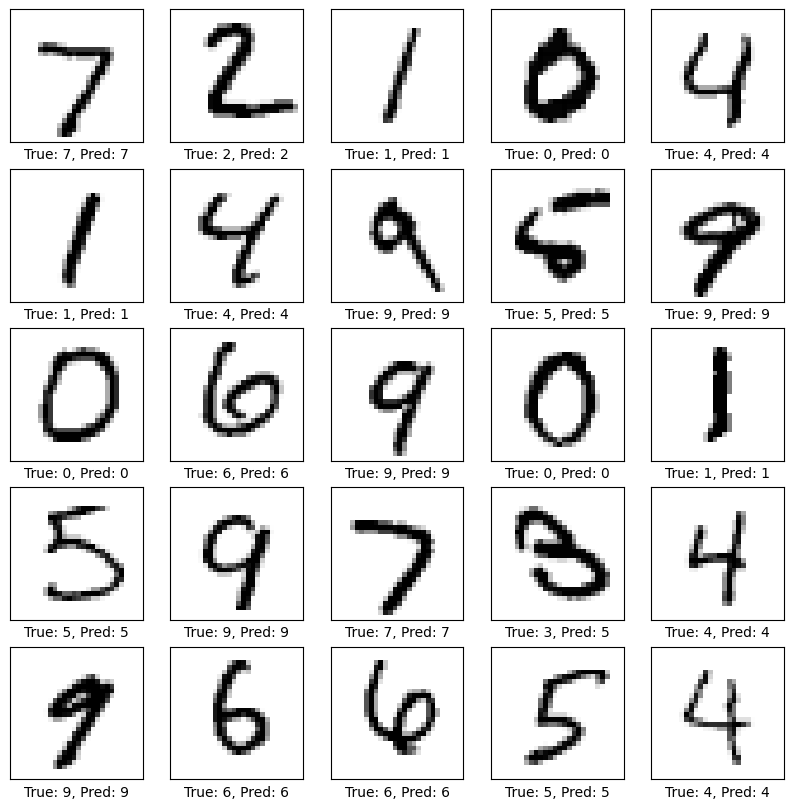

In [12]:
# Get predictions
predicted_labels = np.argmax(predictions, axis=1)

# Display a few sample images along with their true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(f"True: {test_labels[i]}, Pred: {predicted_labels[i]}")

plt.show()